In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 300
title_fontsize = 18
legend_fontsize = 14
label_fontsize = 16

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('stats.csv')

# Remove 'Ghost' from TrainType and TestType columns if it exists
df['TrainType'] = df['TrainType'].str.replace('Ghost', '')
df['TestType'] = df['TestType'].str.replace('Ghost', '')

# Create a new column that concatenates TrainType and TestType
df['Experiment'] = df['TrainType'] + ', ' + df['TestType']
df = df.sort_values(by=['TrainType', 'TestType'])

df['WinRate'] = df['WinRate'] * 100

## Analysis of Results for 4-Layer DQN, 5000 Training Games

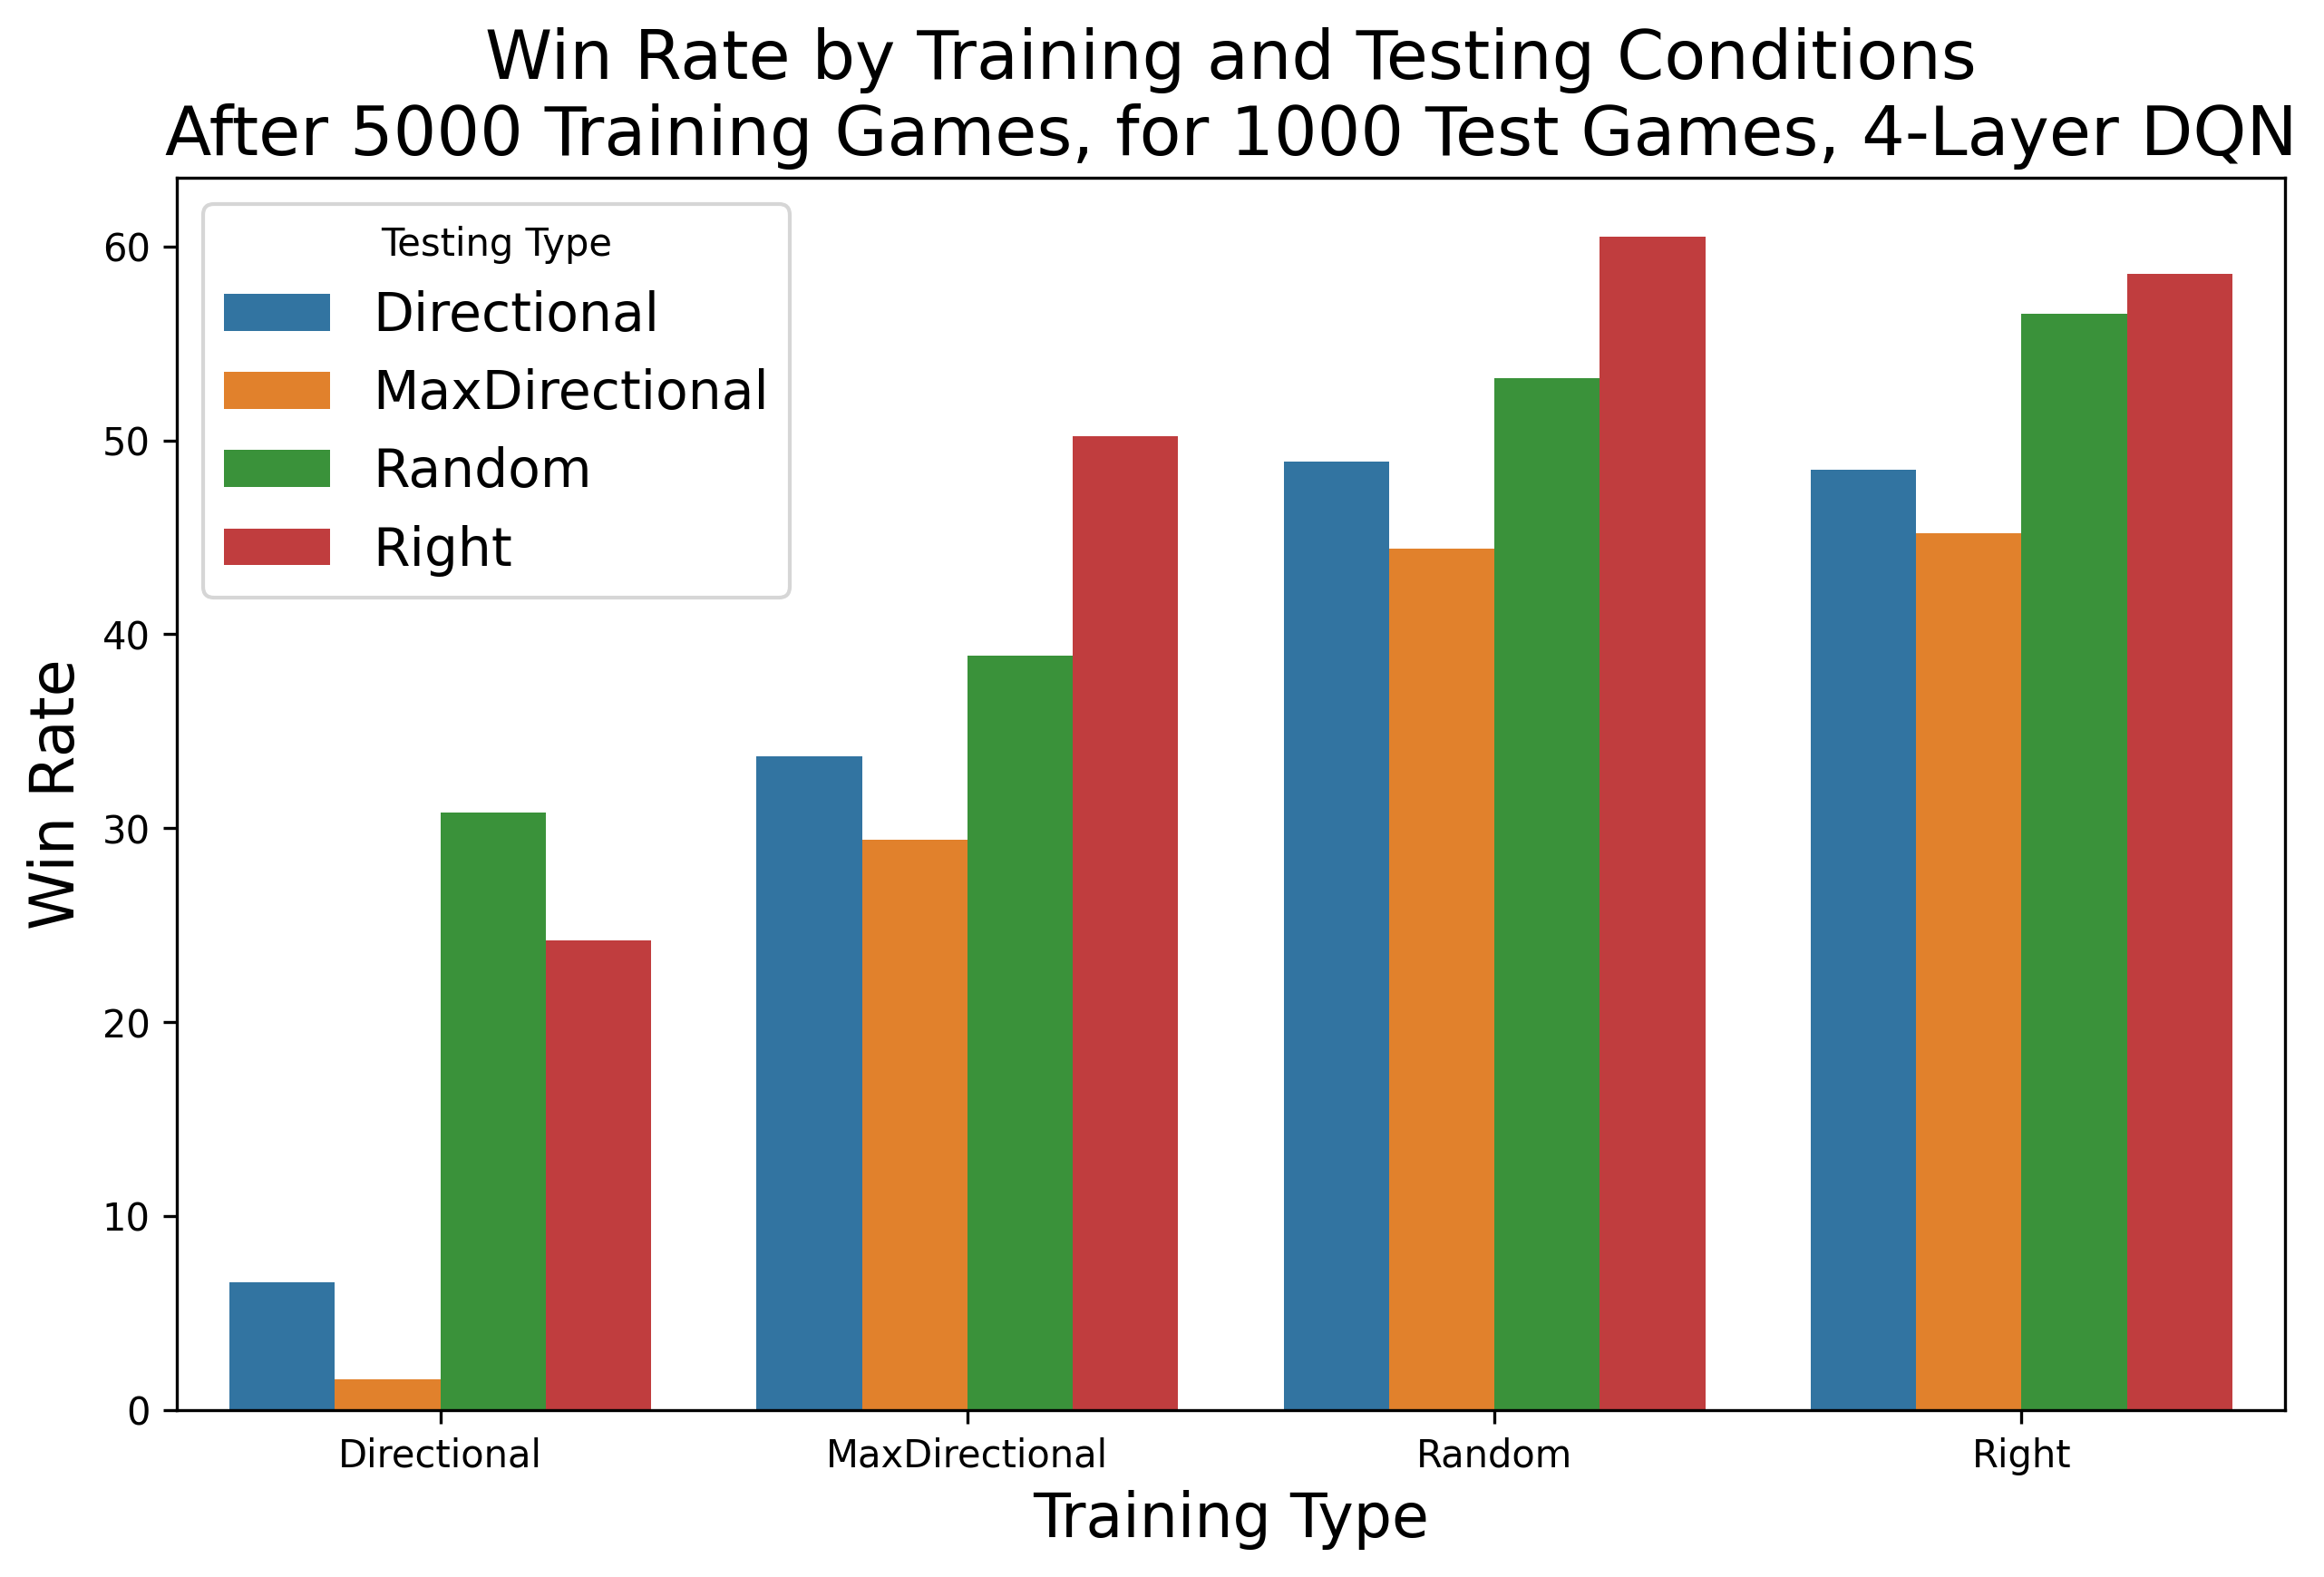

In [4]:
plt.figure(figsize=(10, 6))

fourResults = df[(df['Layers'] == 4) & (df['TrainGames'] == 5000)].sort_values(by='TrainType')

# Plot
sns.barplot(x='TrainType', y='WinRate', hue='TestType', data=fourResults)

# Adding title and labels
plt.title('Win Rate by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games, 4-Layer DQN', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Win Rate', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=legend_fontsize)

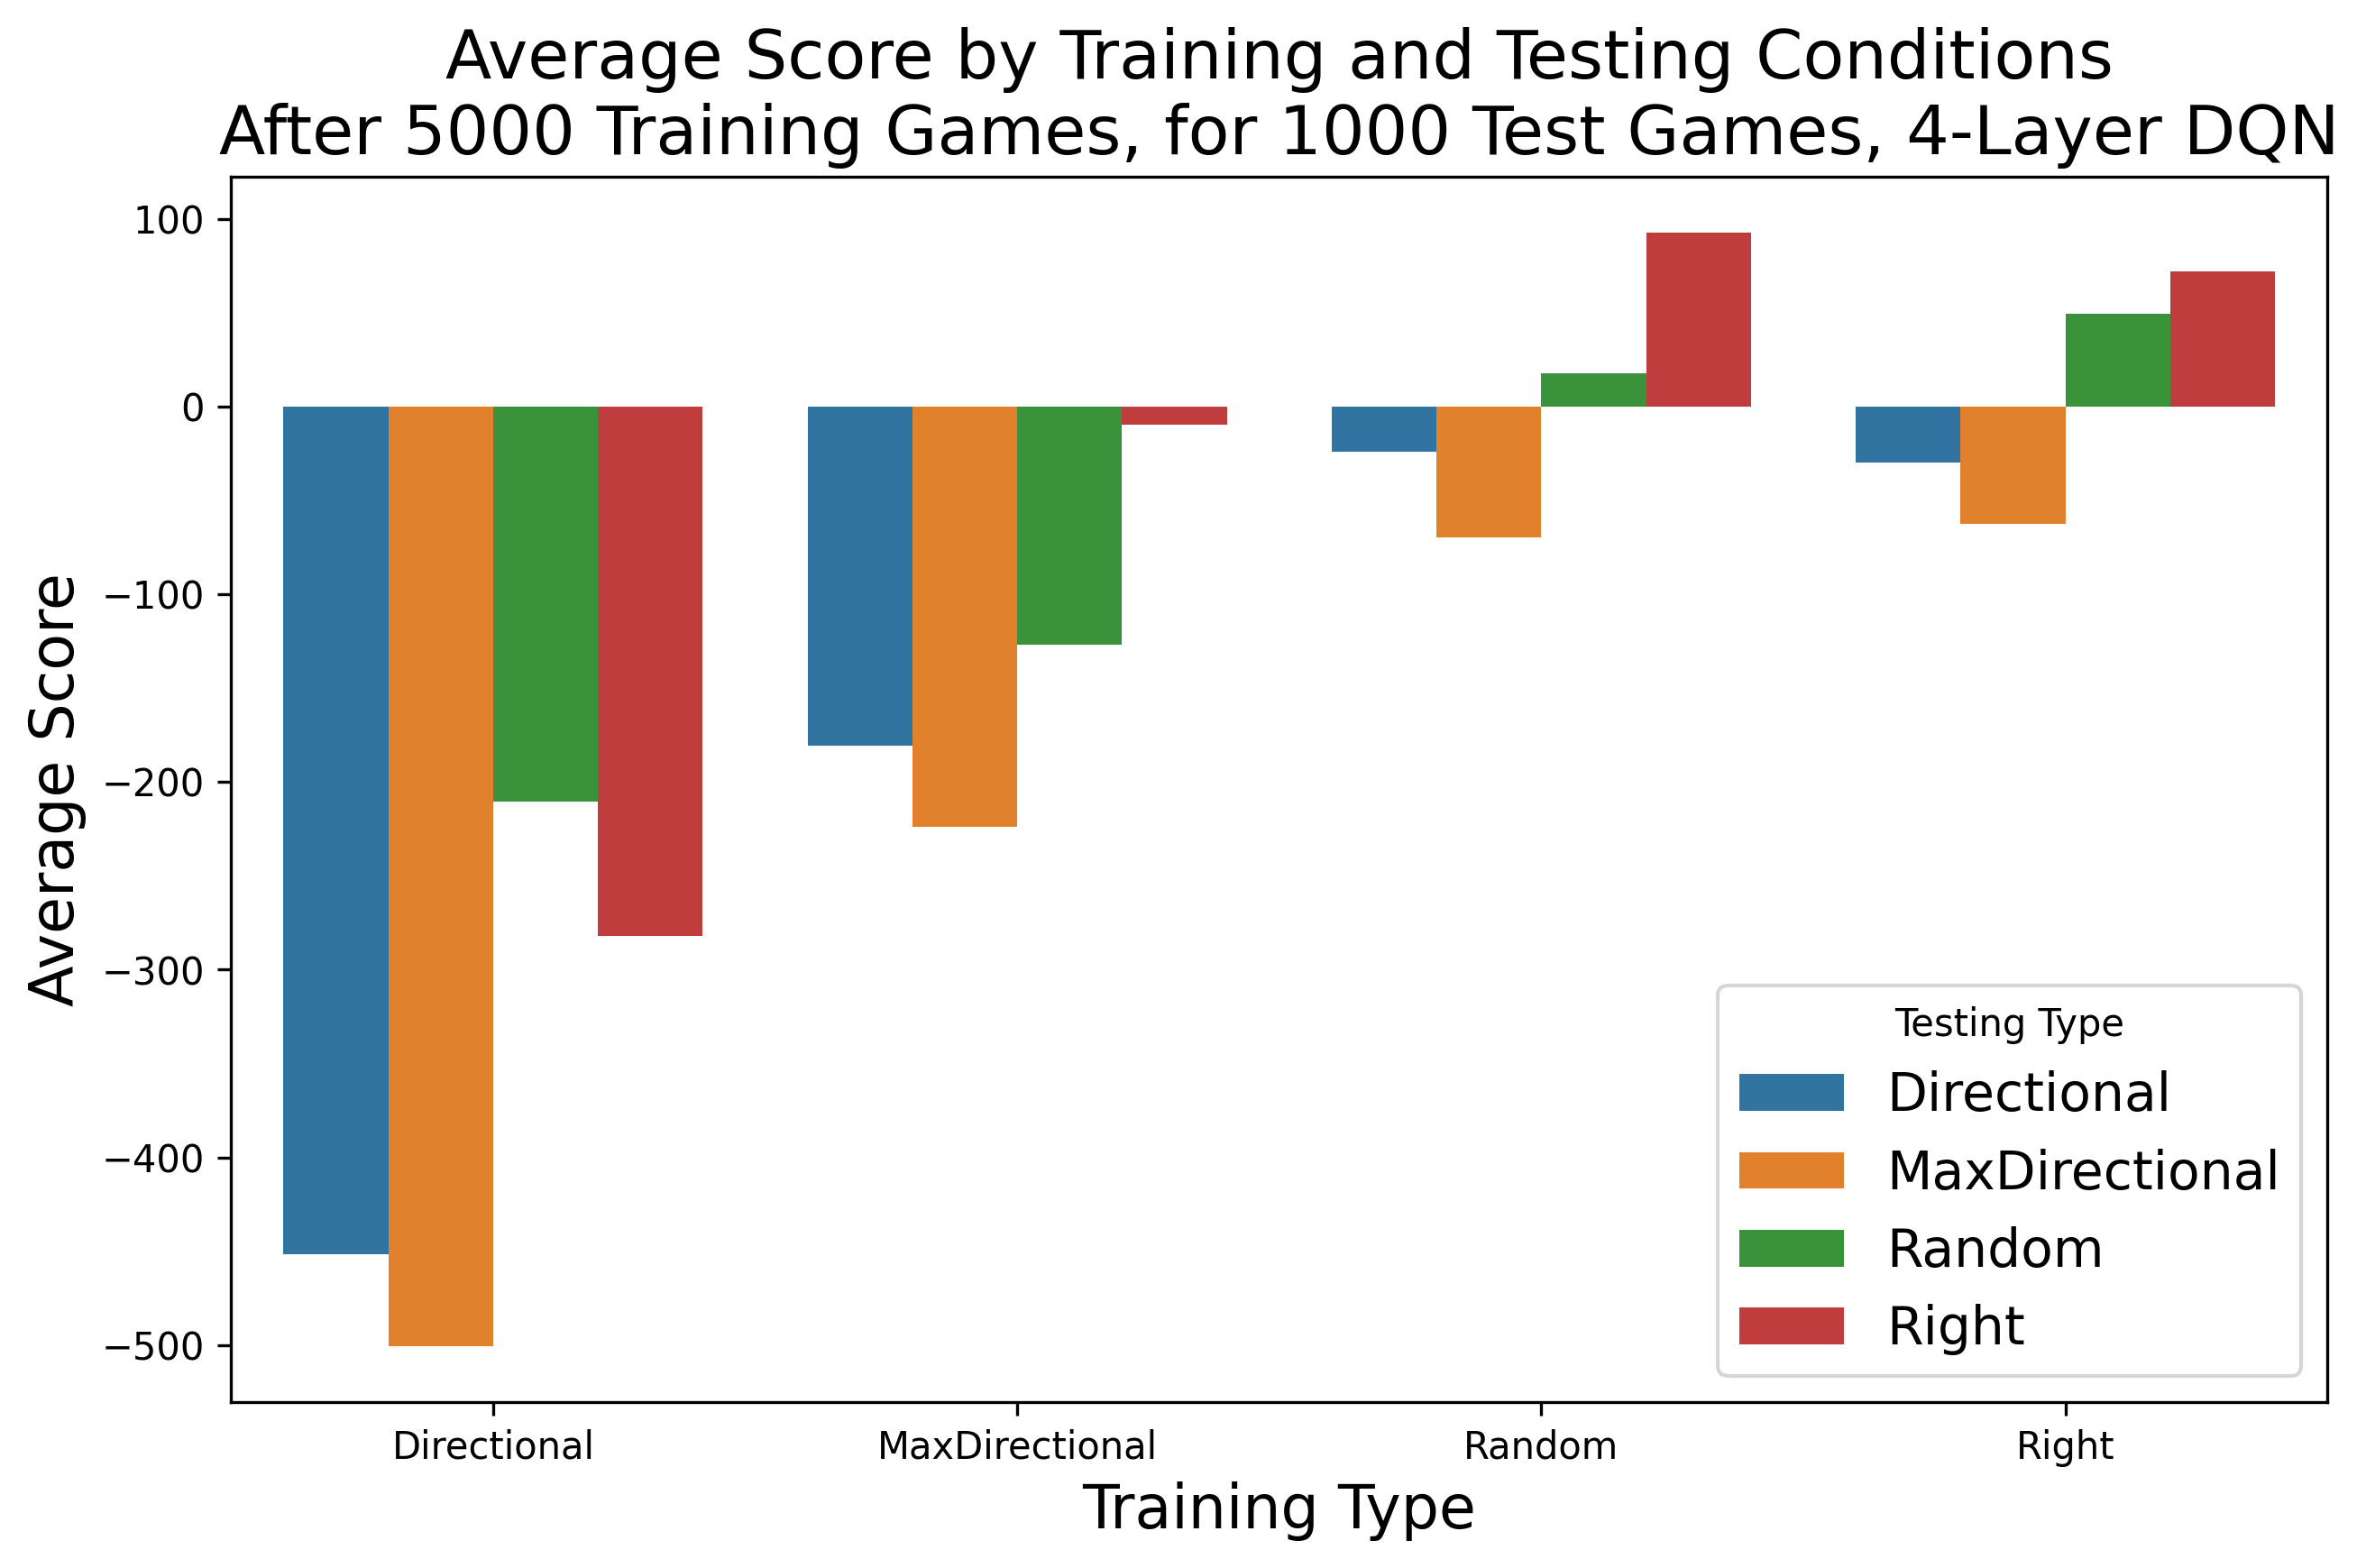

In [5]:
plt.figure(figsize=(10, 6))

# Plot
sns.barplot(x='TrainType', y='AverageScore', hue='TestType', data=fourResults)

# Adding title and labels
plt.title('Average Score by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games, 4-Layer DQN', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Average Score', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=legend_fontsize)

## Analysis of Results for All Layers, 5000 Training Games

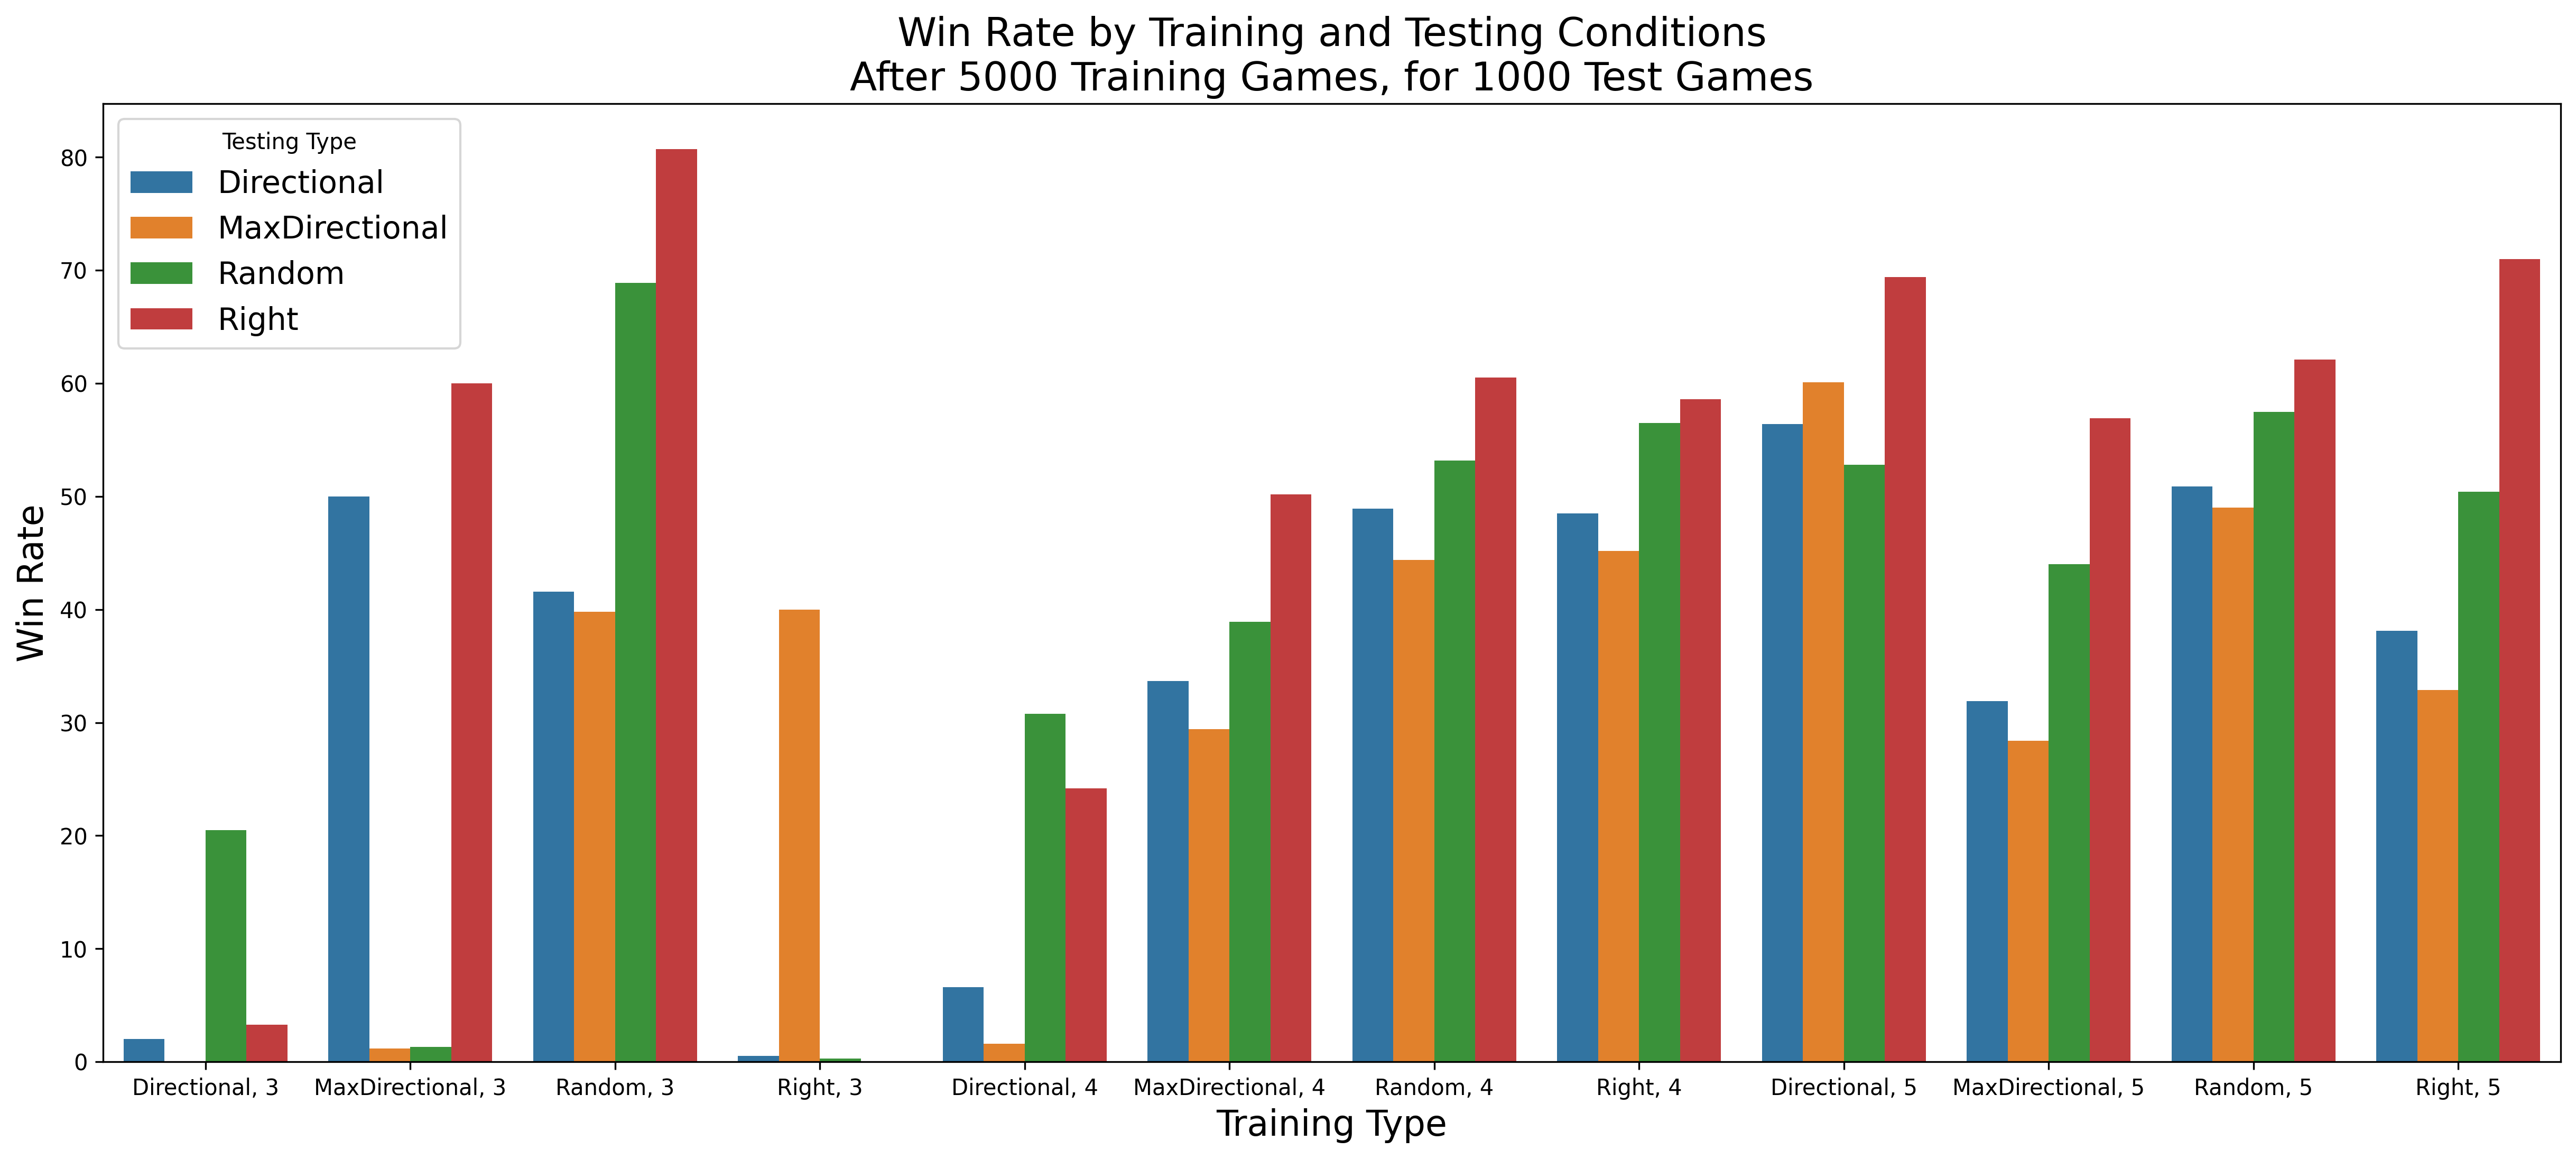

In [6]:
plt.figure(figsize=(20, 8))

allLayers = df.copy()
allLayers = allLayers[allLayers['TrainGames'] == 5000]

allLayers['TrainConditions'] = allLayers['TrainType'] + ', ' + allLayers['Layers'].astype(str)

allLayers = allLayers.sort_values(by=['Layers', 'TrainType'])

# Plot
sns.barplot(x='TrainConditions', y='WinRate', hue='TestType', data=allLayers)

# Adding title and labels
plt.title('Win Rate by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Win Rate', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=legend_fontsize)

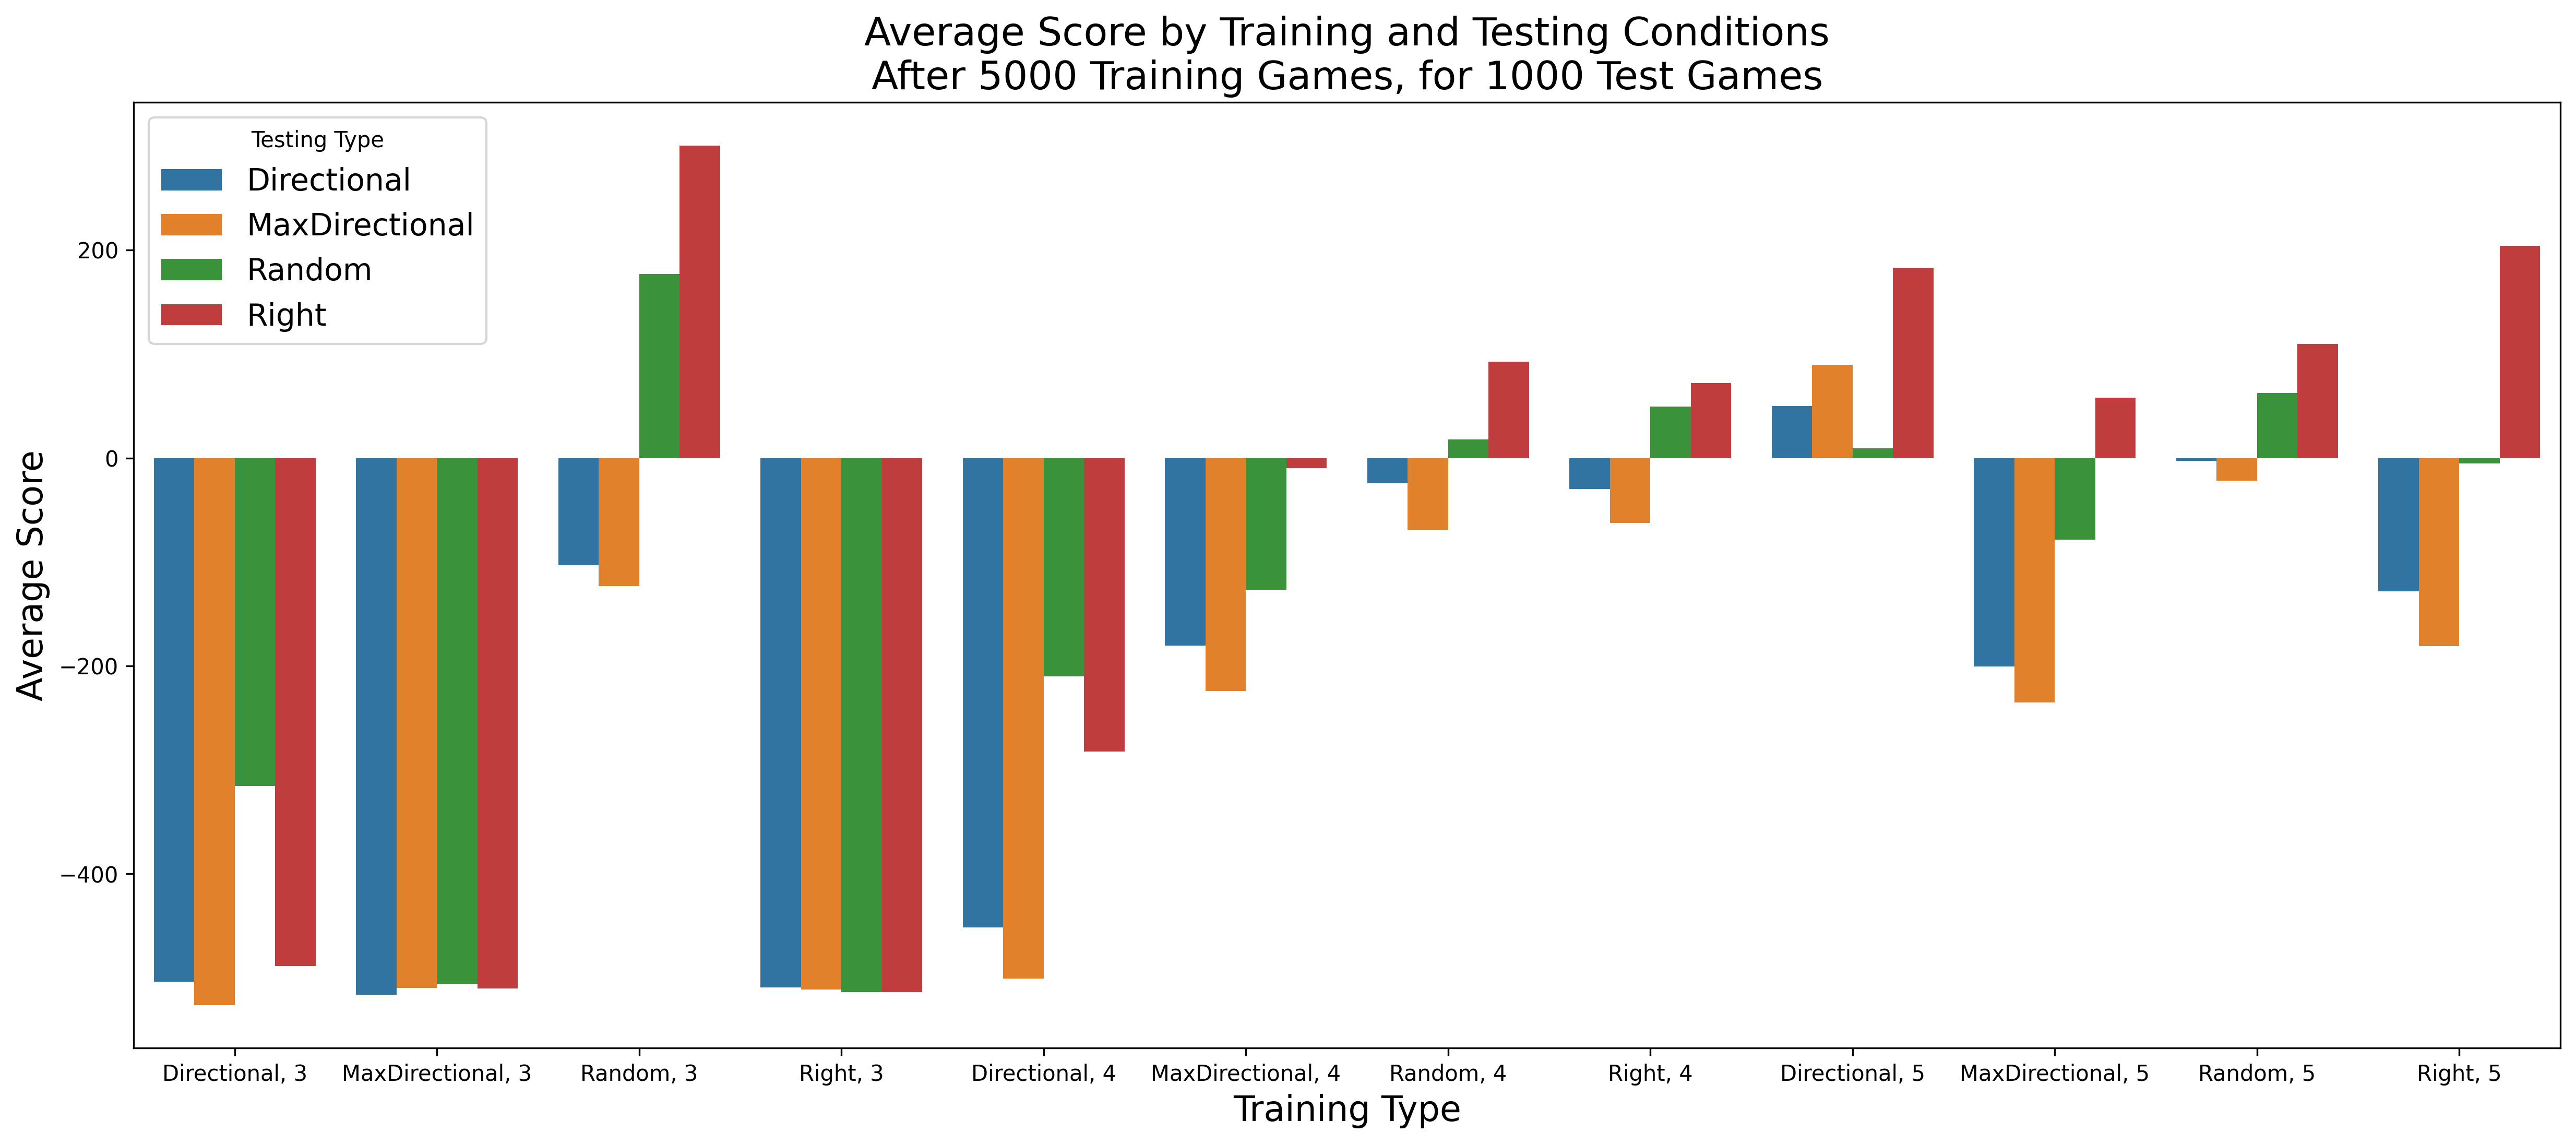

In [7]:
plt.figure(figsize=(20, 8))

# Plot
sns.barplot(x='TrainConditions', y='AverageScore', hue='TestType', data=allLayers)

# Adding title and labels
plt.title('Average Score by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Average Score', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=legend_fontsize)

In [8]:
result = allLayers.groupby(['TrainType', 'Layers']).agg({'AverageScore': 'mean', 'WinRate': 'mean'}).reset_index()

# Print the result
print(result)

         TrainType  Layers  AverageScore  WinRate
0      Directional       3    -458.65350    6.450
1      Directional       4    -361.24725   15.800
2      Directional       5      82.99300   59.675
3   MaxDirectional       3    -510.50900   28.125
4   MaxDirectional       4    -135.30100   38.050
5   MaxDirectional       5    -114.07950   40.300
6           Random       3      62.83775   57.750
7           Random       4       4.24575   51.750
8           Random       5      36.88200   54.875
9            Right       3    -512.09000   10.200
10           Right       4       7.24225   52.200
11           Right       5     -27.51975   48.100


In [16]:
result = allLayers.groupby(['Layers', 'TestType']).agg({'AverageScore': 'mean', 'WinRate': 'mean'}).reset_index()

# Print the result
print(result)

    Layers        TestType  AverageScore  WinRate
0        3     Directional    -408.22975   23.525
1        3  MaxDirectional    -417.55075   20.250
2        3          Random    -289.50100   22.750
3        3           Right    -303.13325   36.000
4        4     Directional    -171.58075   34.425
5        4  MaxDirectional    -214.18075   30.150
6        4          Random     -67.43625   44.850
7        4           Right     -31.86250   48.375
8        5     Directional     -70.31625   44.325
9        5  MaxDirectional     -87.07350   42.600
10       5          Random      -3.00375   51.175
11       5           Right     138.66925   64.850


## Analysis of Results for Select Layers, 50000 Training Games

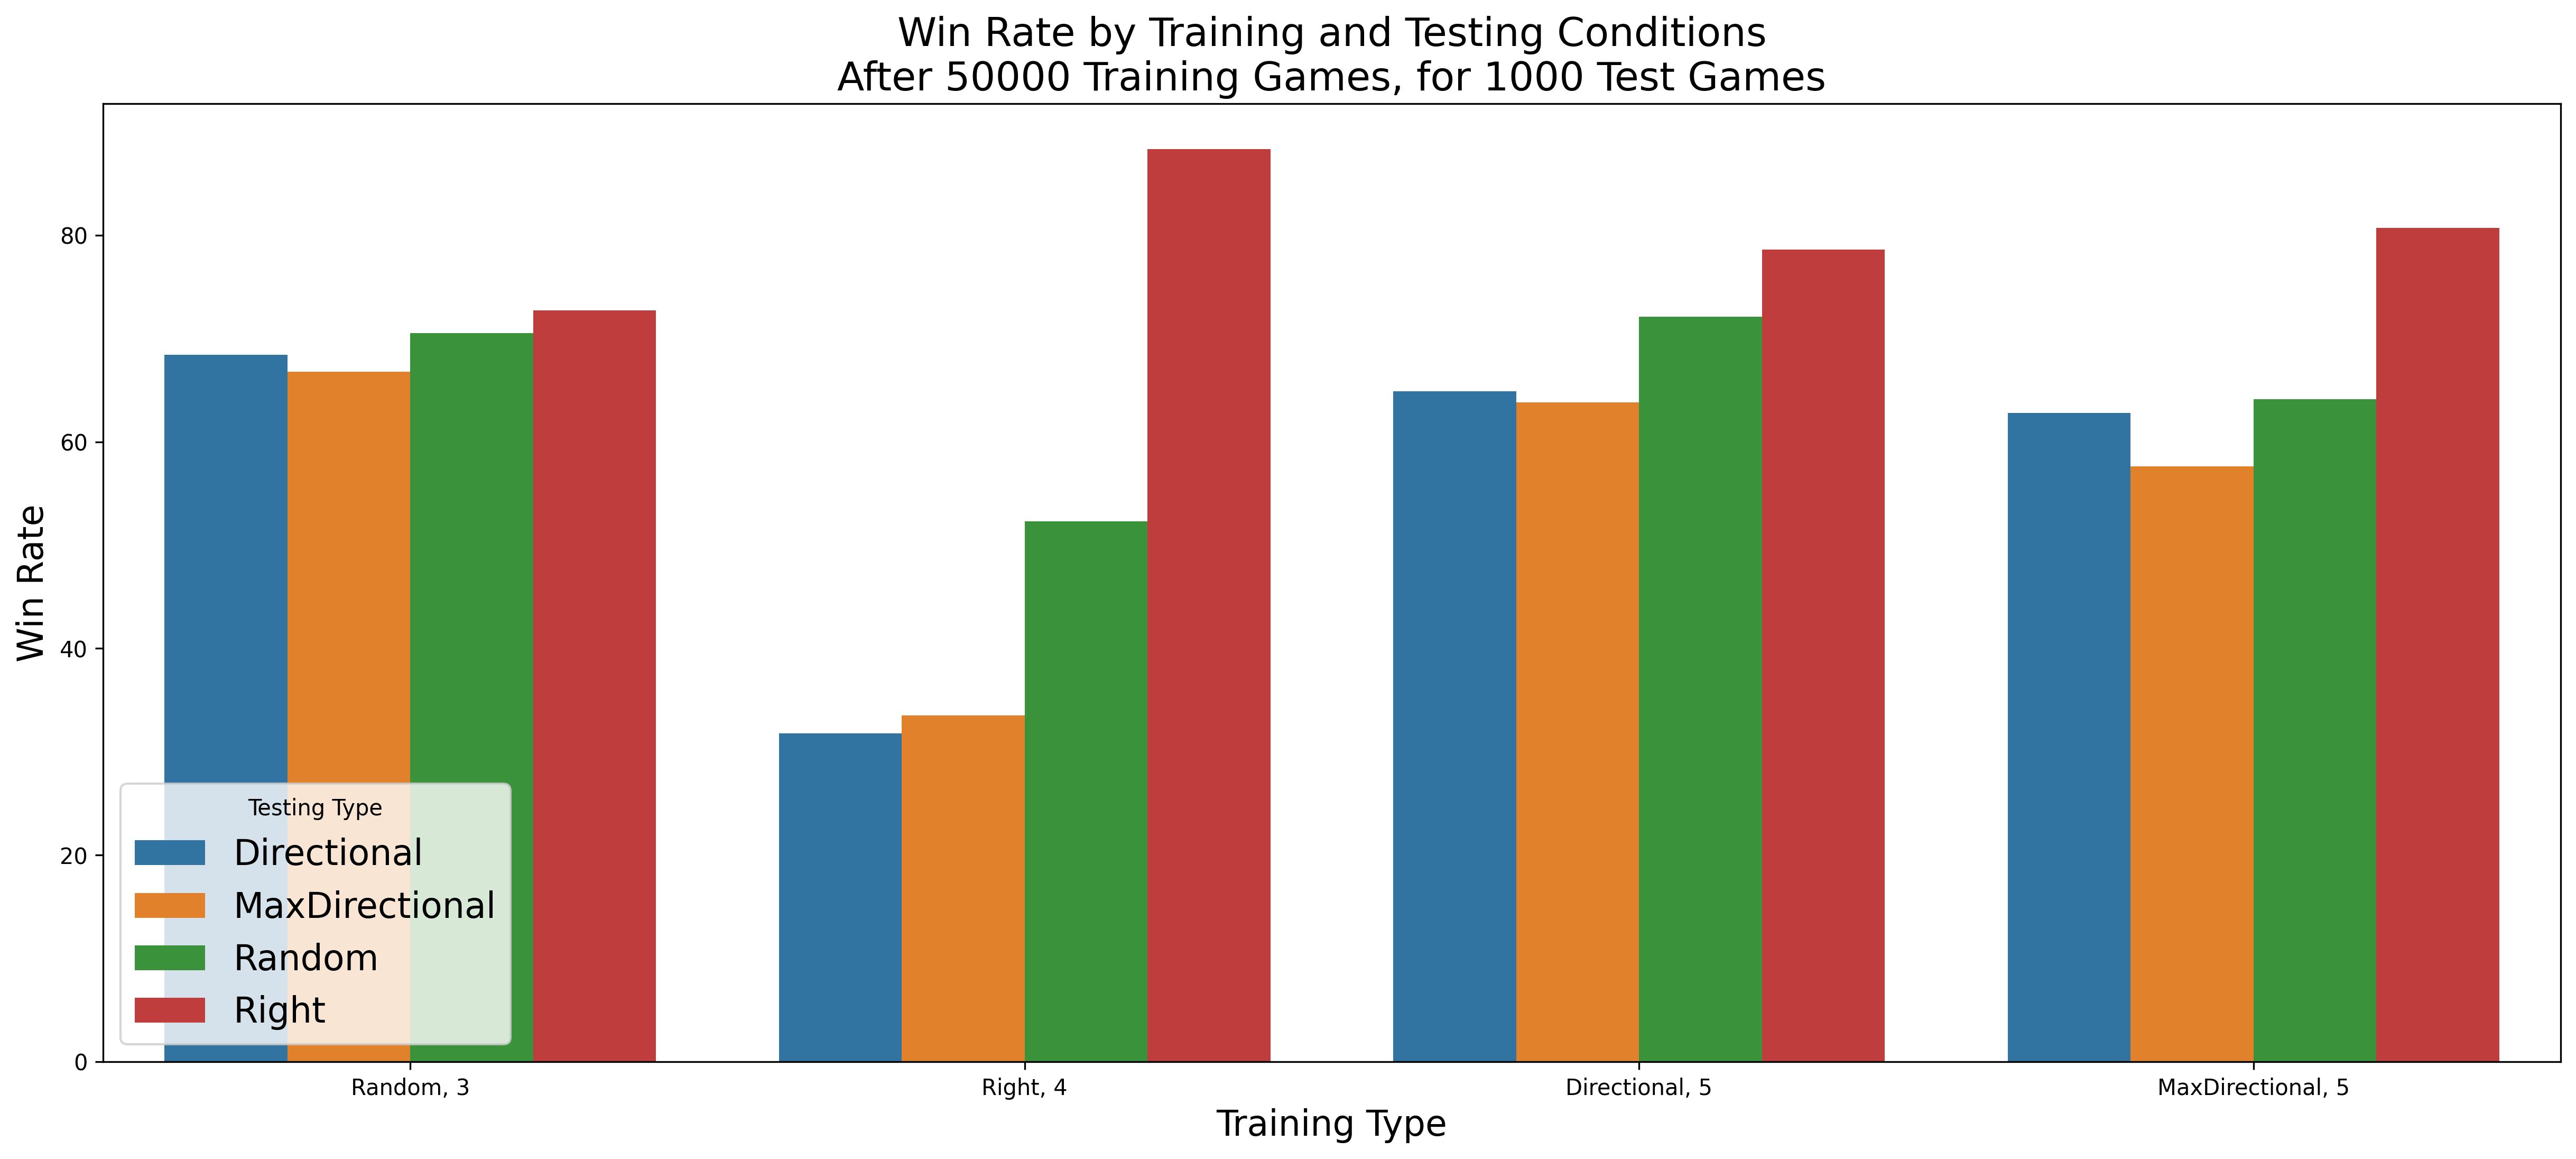

In [9]:
plt.figure(figsize=(20, 8))

moreTraining = df.copy()
moreTraining = moreTraining[moreTraining['TrainGames'] == 50000]

moreTraining['TrainConditions'] = moreTraining['TrainType'] + ', ' + moreTraining['Layers'].astype(str)

moreTraining = moreTraining.sort_values(by=['Layers', 'TrainType'])

# Plot
sns.barplot(x='TrainConditions', y='WinRate', hue='TestType', data=moreTraining)

# Adding title and labels
plt.title('Win Rate by Training and Testing Conditions\nAfter 50000 Training Games, for 1000 Test Games', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Win Rate', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=label_fontsize, loc='lower left')

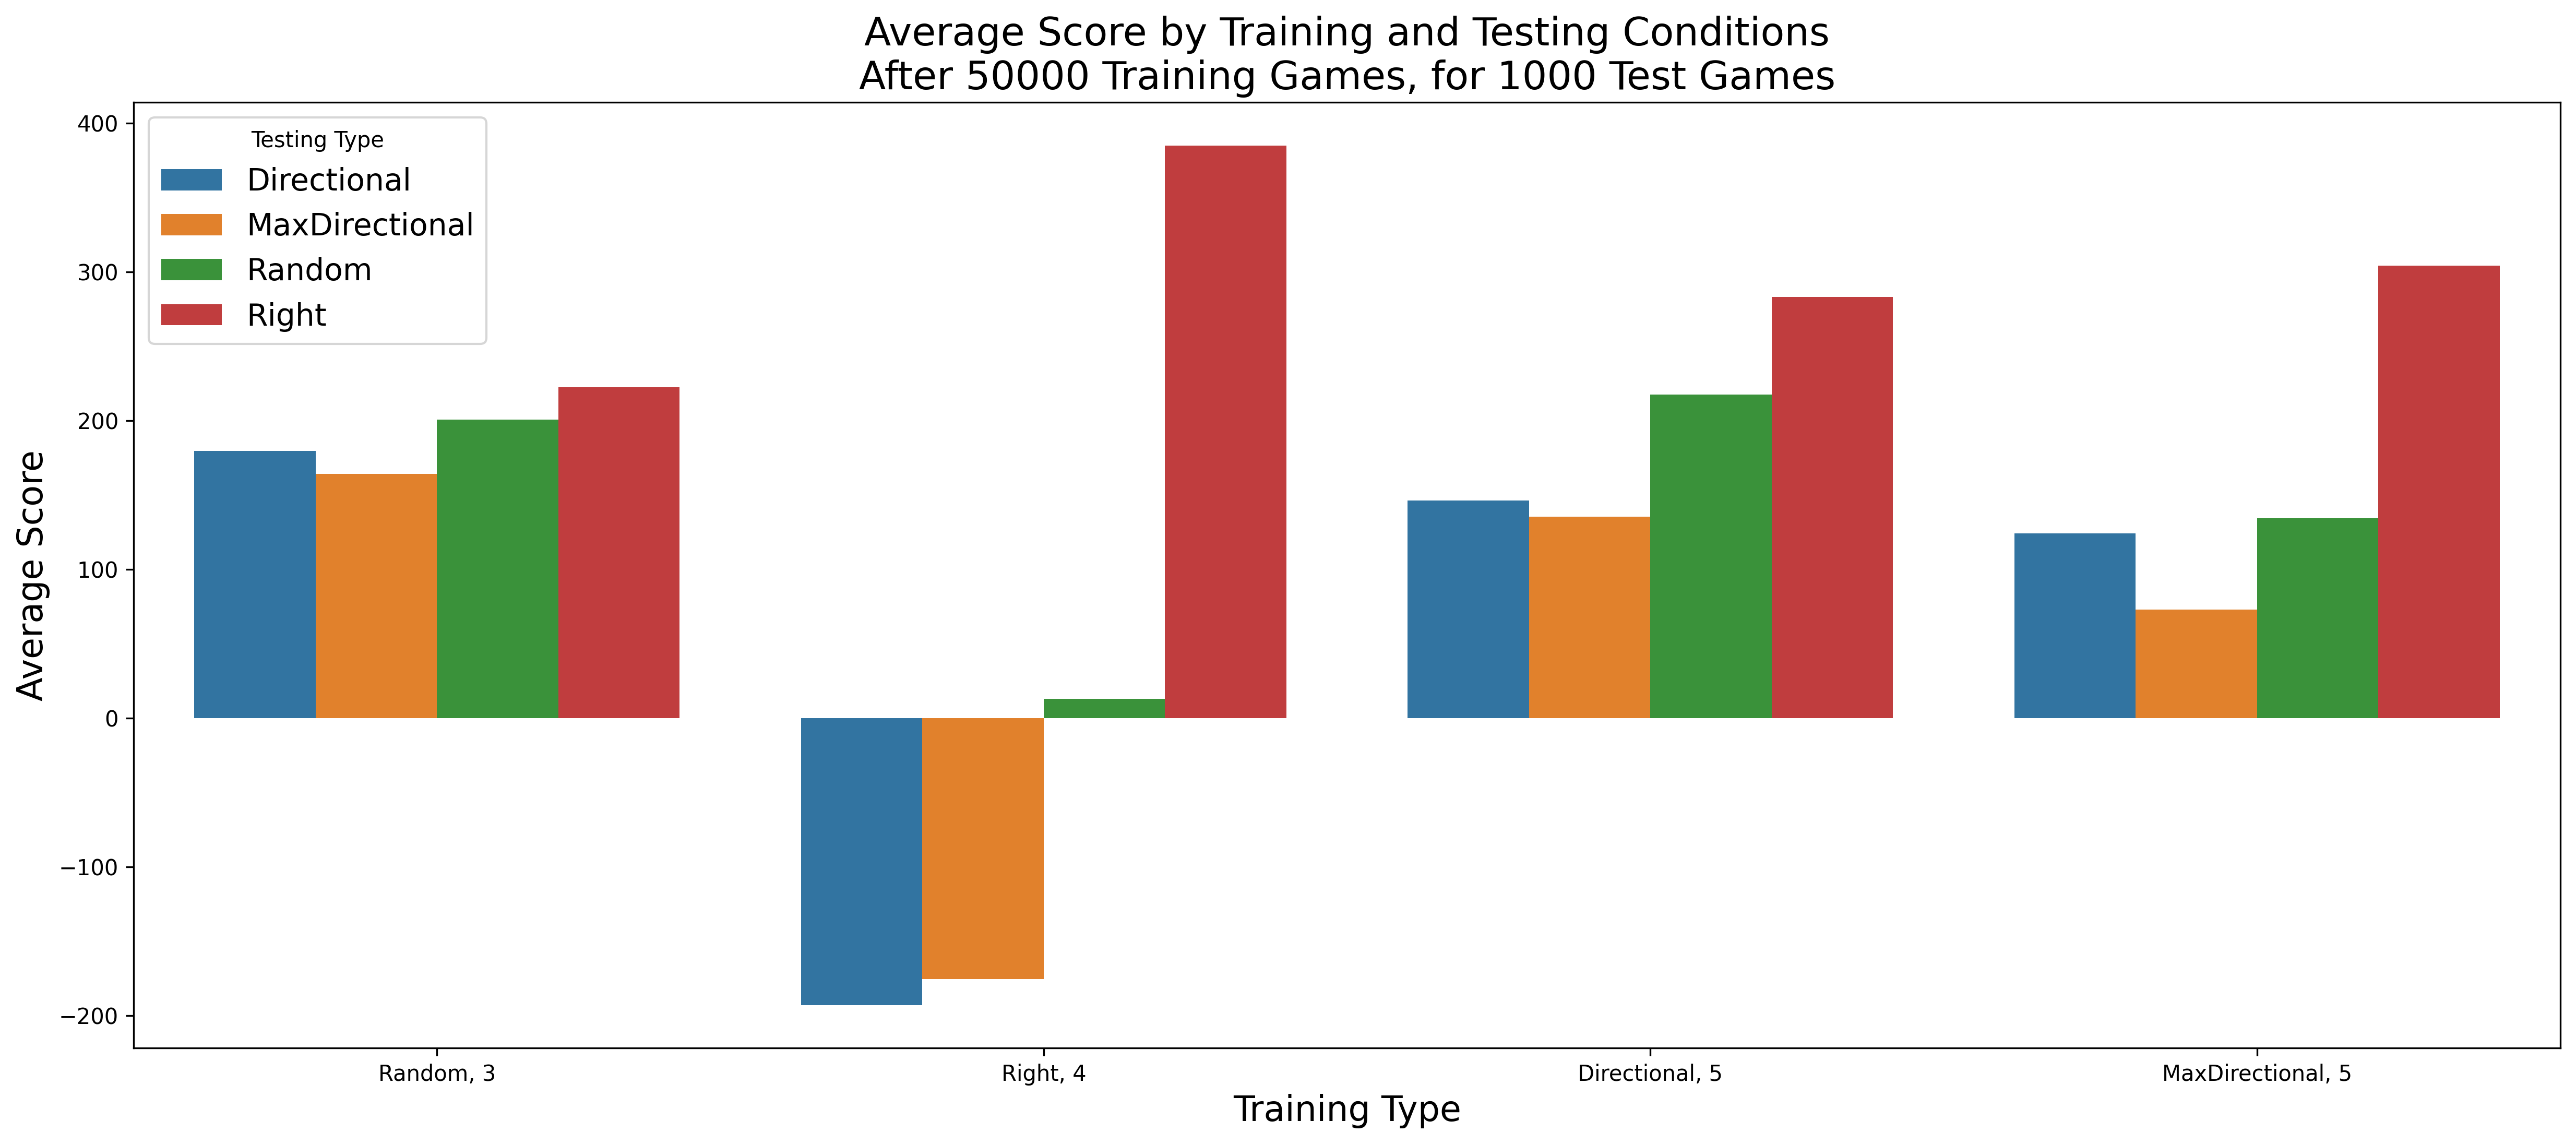

In [10]:
plt.figure(figsize=(20, 8))

# Plot
sns.barplot(x='TrainConditions', y='AverageScore', hue='TestType', data=moreTraining)

# Adding title and labels
plt.title('Average Score by Training and Testing Conditions\nAfter 50000 Training Games, for 1000 Test Games', fontsize=title_fontsize)
plt.xlabel('Training Type', fontsize=label_fontsize)
plt.ylabel('Average Score', fontsize=label_fontsize)
plt.legend(title='Testing Type', fontsize=legend_fontsize)

In [11]:
result = moreTraining.groupby(['TrainType', 'Layers']).agg({'AverageScore': 'mean', 'WinRate': 'mean'}).reset_index()

# Print the result
print(result)

        TrainType  Layers  AverageScore  WinRate
0     Directional       5     195.70175   69.850
1  MaxDirectional       5     159.04025   66.300
2          Random       3     191.91700   69.600
3           Right       4       7.53350   51.475


In [18]:
result = moreTraining.groupby(['TestType']).agg({'AverageScore': 'mean', 'WinRate': 'mean'}).reset_index()

# Print the result
print(result)

         TestType  AverageScore  WinRate
0     Directional      64.38775   56.975
1  MaxDirectional      49.46800   55.425
2          Random     141.50525   64.750
3           Right     298.83150   80.075


## Appendix

In [12]:
color_map = {'Random': '#1f77b4', 'Right': '#2ca02c', 'Directional': '#d62728', 'MaxDirectional': '#9467bd'}  # Add more colors if needed

# Create a list of colors corresponding to each TestType
colors = [color_map[test_type] for test_type in df['TestType']]

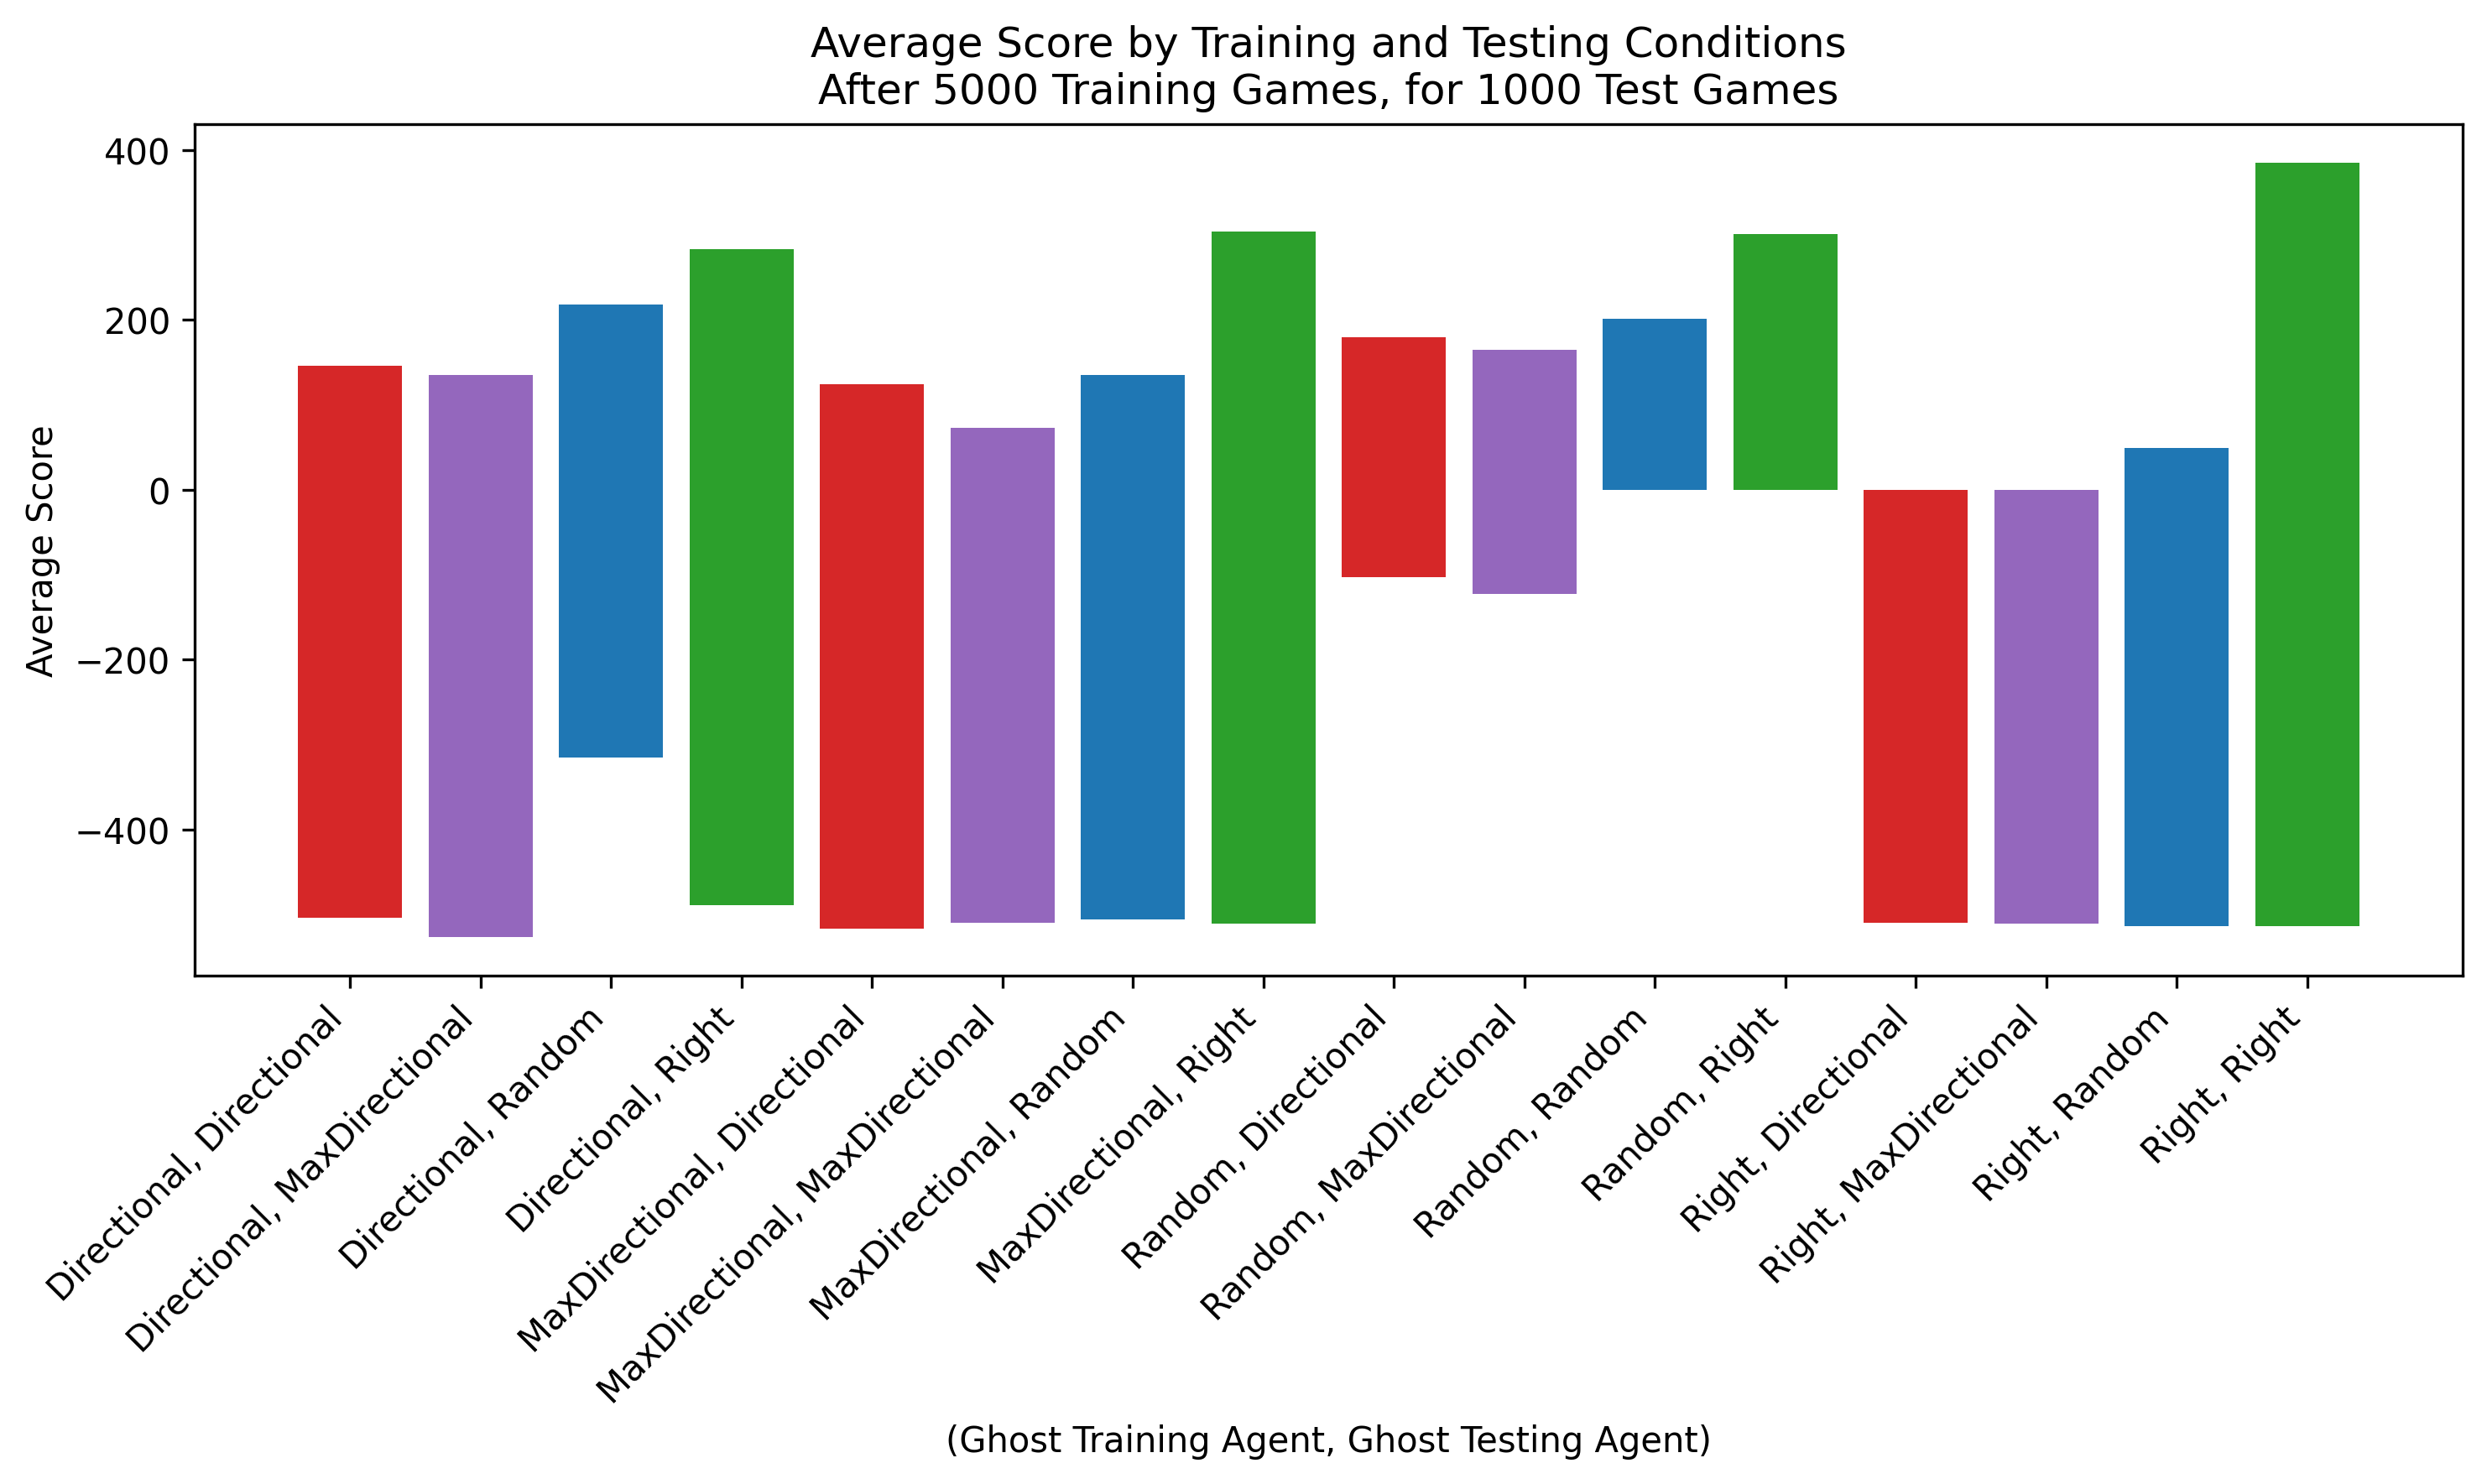

In [13]:
# Plotting AverageScore
plt.figure(figsize=(10, 6))
plt.bar(df['Experiment'], df['AverageScore'], color=colors)
plt.xlabel('(Ghost Training Agent, Ghost Testing Agent)')
plt.ylabel('Average Score')
plt.title('Average Score by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

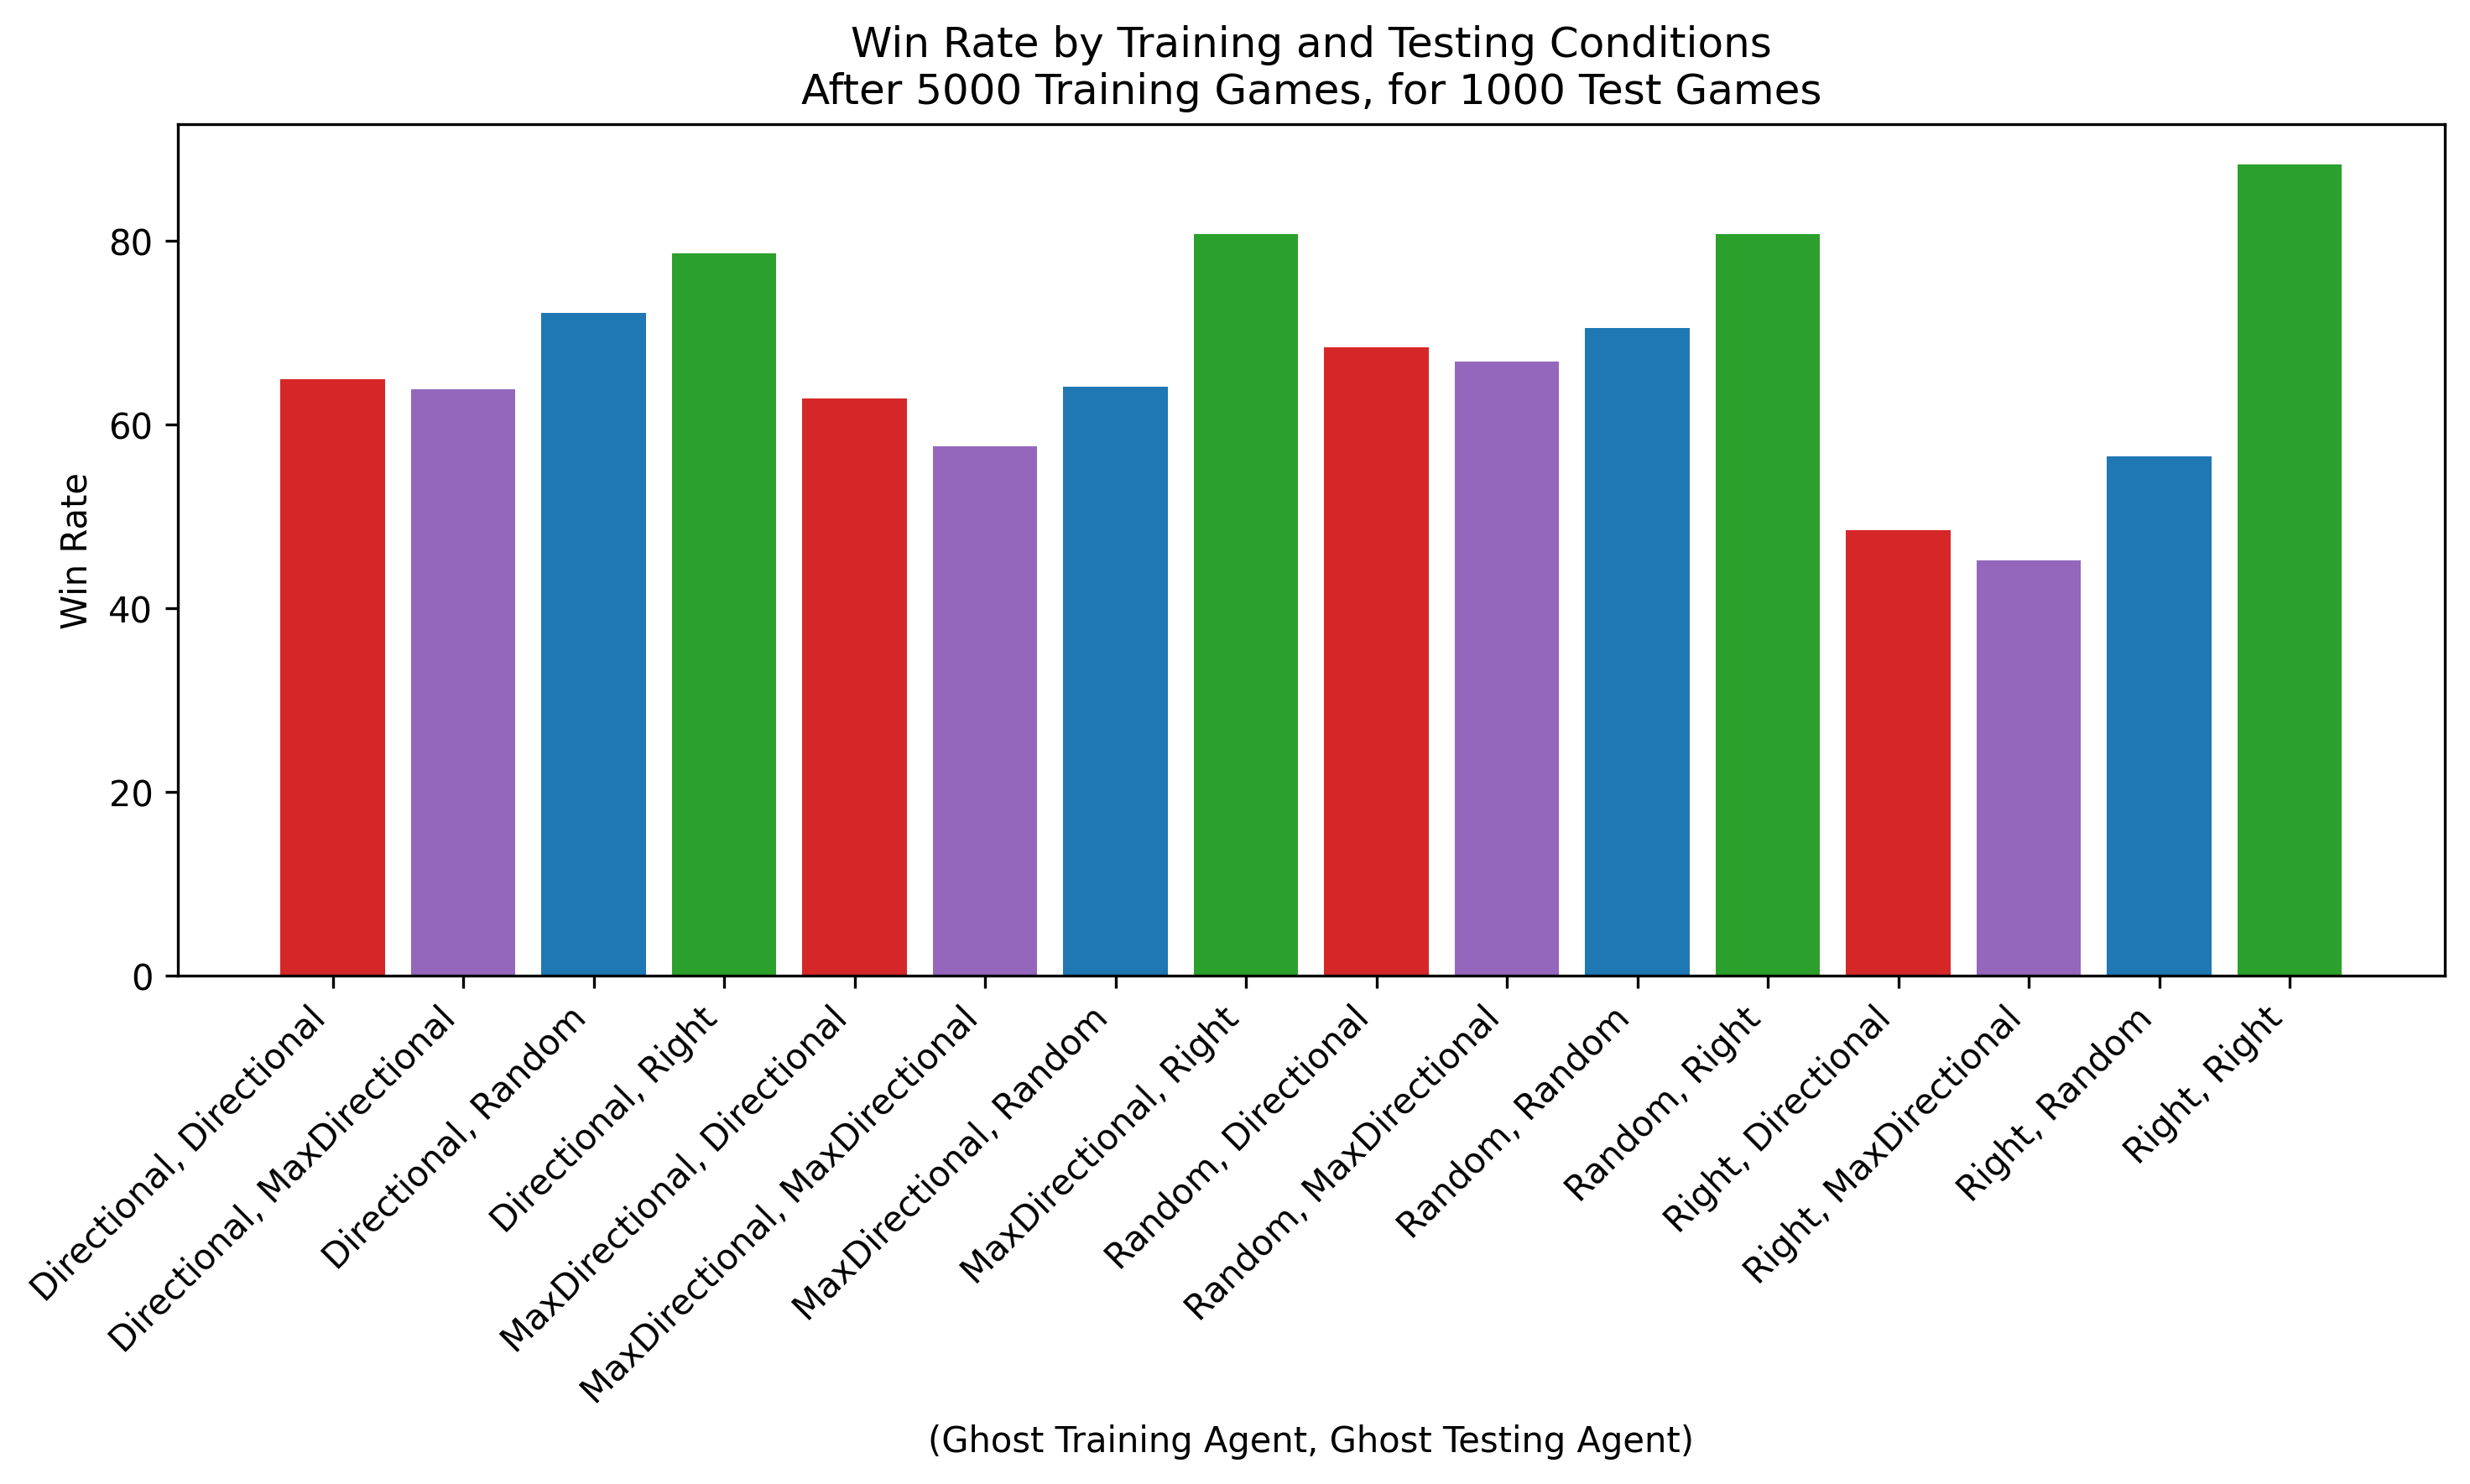

In [14]:
# Plotting WinRate
plt.figure(figsize=(10, 6))
plt.bar(df['Experiment'], df['WinRate'], color=colors)
plt.xlabel('(Ghost Training Agent, Ghost Testing Agent)')
plt.ylabel('Win Rate')
plt.title('Win Rate by Training and Testing Conditions\nAfter 5000 Training Games, for 1000 Test Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()